In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [4]:
# Read UCLA data set
admission = pd.read_csv("binary.csv")

In [5]:
admission

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


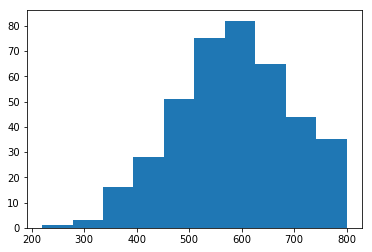

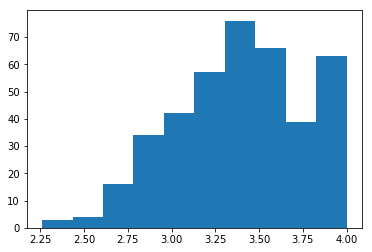

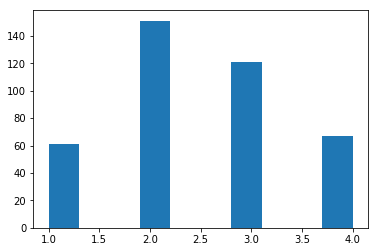

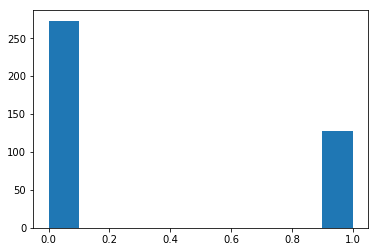

In [6]:
X = admission.iloc[:,1:4]
Y = admission.iloc[:,0]
plt.hist(X.iloc[:,0])
plt.show()
plt.hist(X.iloc[:,1])
plt.show()
plt.hist(X.iloc[:,2])
plt.show()
plt.hist(Y)
plt.show()

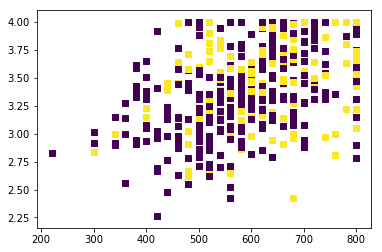

In [7]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y, marker ='s')
plt.show()

In [8]:
# Shuffle the dataset
admissions = admission.loc[np.random.permutation(admission.index)]

In [9]:
num_train = 300
data_train = admission[:num_train]
data_test = admission[num_train:]

In [10]:
model = LogisticRegression()

In [11]:
model.fit(data_train[['gpa','gre','rank']],data_train['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
train = model.predict_proba(data_train[['gpa','gre','rank']])[:,1]

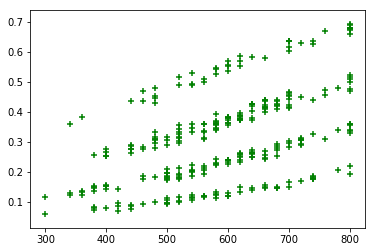

In [13]:
plt.scatter(data_train['gre'], train, marker = '+', color = 'g')
plt.xlabel = 'gre'
plt.ylabel = 'Prob'
plt.show()

In [14]:
pred_train = model.predict(data_train[['gpa','gre','rank']])

In [15]:
accuracy_train = (pred_train == data_train['admit']).mean()
accuracy_train

0.71666666666666667

In [16]:
pred_test = model.predict(data_test[['gpa','gre','rank']])

In [17]:
accuracy_test = (pred_test == data_test['admit']).mean()
accuracy_test

0.68000000000000005

Auc_train: 0.712688127090301
Auc_test: 0.5846153846153845


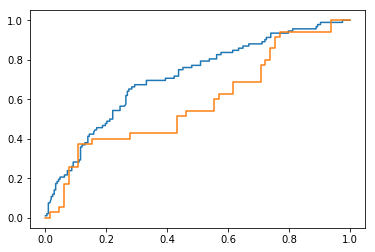

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

train_probs = model.predict_proba(data_train[['gpa', 'gre','rank']])[:,1]
test_probs = model.predict_proba(data_test[['gpa', 'gre','rank']])[:,1]

auc_train = roc_auc_score(data_train["admit"], train_probs)
auc_test = roc_auc_score(data_test["admit"], test_probs)

print('Auc_train: {}'.format(auc_train))
print('Auc_test: {}'.format(auc_test))

roc_train = roc_curve(data_train["admit"], train_probs)
roc_test = roc_curve(data_test["admit"], test_probs)

plt.plot(roc_train[0], roc_train[1])

plt.plot(roc_test[0], roc_test[1])
plt.show()